In [1]:
# import higra as hg
import rasterio
import os, glob
import matplotlib.pyplot as plt
from matplotlib import gridspec, cm
%matplotlib inline

In [2]:
import sys
module_path='/home/jovyan/Crop_boundary_model/'
if module_path not in sys.path:
    sys.path.append(module_path)
print(sys.path)

['/home/jovyan/Crop_boundary_model/decode/examples', '/usr/lib/python38.zip', '/usr/lib/python3.8', '/usr/lib/python3.8/lib-dynload', '', '/home/jovyan/.local/lib/python3.8/site-packages', '/usr/local/lib/python3.8/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.8/dist-packages/IPython/extensions', '/home/jovyan/.ipython', '/home/jovyan/Crop_boundary_model/']


In [3]:
from decode.postprocessing import instance_segmentation

/usr/local/lib/python3.8/dist-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/local/lib/python3.8/dist-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/usr/local/lib/python3.8/dist-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/usr/local/lib/python3.8/dist-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [7]:
fn_preds = '/predictions.tif'

Read the output of Fractal ResUNet. It consists in three bands: the extent mask, the boundary mask and the distance mask.

In [8]:
with rasterio.open(fn_preds, 'r') as src:
    r_xtt, r_bnd, r_dst = src.read()

NameError: name 'rasterio' is not defined

Visualise these three masks

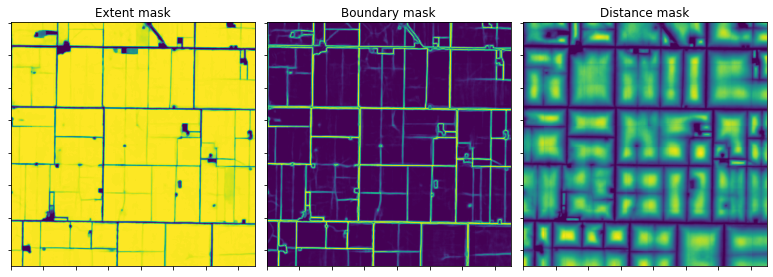

In [27]:
plot_preds(r_xtt, r_bnd, r_dst)

Use the extent mask and the boundary mask as input to the hierarchical wathershed segmentation algorithm.
Two parameters need to be defined:
- t_ext: a threshold applied on the extent mask which controls 
- t_bound: a threshold that defines the level at which the hierachl watershed segm

In [63]:
out = InstSegm(r_xtt, r_bnd, t_ext=0.5, t_bound=0.2)

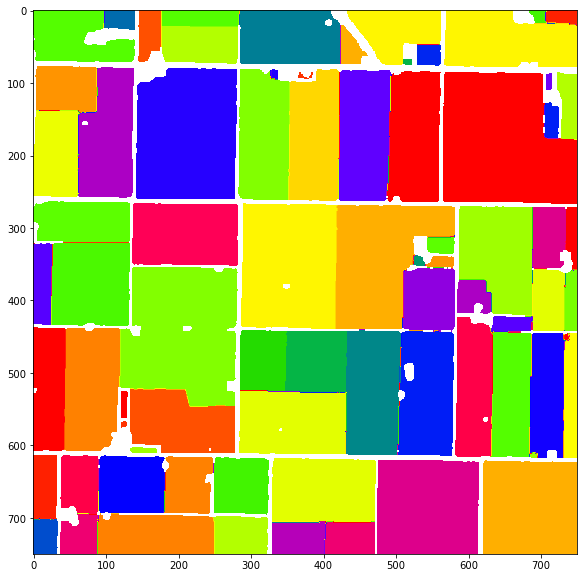

In [64]:
fig = plt.figure(figsize=(10,10))
plt.imshow(out, cmap=plt.get_cmap('prism'), interpolation=None)